In [2]:
import pandas as pd
import seaborn as sns

In [3]:
transactional = apd.read_csv('transaction_data.csv')

NameError: name 'apd' is not defined

## Task 1

In [3]:
print(transactional.shape)
print(transactional.info())
print(transactional.describe())
print("There are 0 empty values")

(5315, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB
None
                       date           name  transaction
count                  5315           5315         5315
unique                 3373             56            3
top     2020-03-02 00:33:10  Masha_Ozerova  successfull
freq                      6            112         3692
There are 0 empty values


## Task 2

<AxesSubplot: >

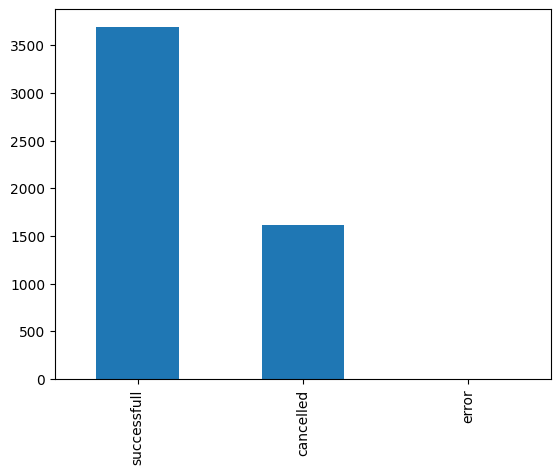

In [4]:
(
    transactional
    .transaction
    .value_counts()
    .plot.bar()
)

## Task 3

In [5]:
# answer - Плохо видно число наблюдений у некоторых значений

## Task 4

In [6]:
# answer - 4

## Task 5

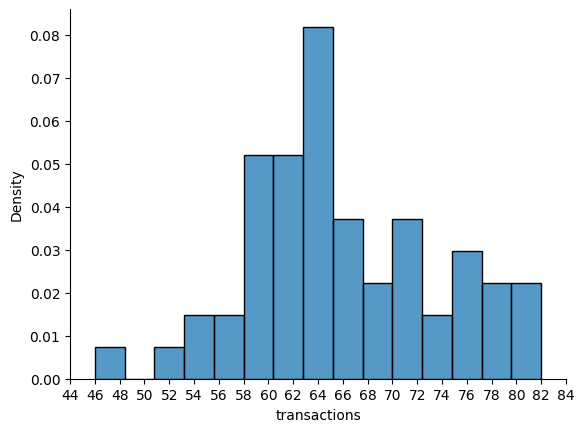

In [20]:
for_dist_plot = (
    transactional
     .query("transaction == 'successfull'")
     .groupby("name", as_index=False)
     .agg(transactions = ("date", "count"))
)

sns.histplot(data = for_dist_plot, x = 'transactions', stat='density', bins = 15).set_xticks(range(44, 85, 2))
sns.despine()
# answer 
# 1. Пользователи в среднем совершили по 64 транзакции
# 2. Максимальное число транзакций – 82
# 3. Примерно 25% пользователей совершили менее 61 транзакции



## Task 6

In [4]:
df = pd.read_csv('transaction_data_updated.csv', parse_dates = ['date'])
df

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17
...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13


In [37]:
user_vs_minute_pivot = (
    df
     .groupby(['minute','name'])
     .agg(transactions = ("transaction", "count"))
     .unstack()
     .fillna(0)
)

## Task 7

In [35]:
# answer - Извлекли минутную часть времени, а не число минут с начала дня

## Task 8

In [8]:
df['true_minute'] = df.date.subtract(df.date.dt.normalize()).astype('timedelta64[m]')
df

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37.0
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59.0
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66.0
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2.0
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17.0
...,...,...,...,...,...
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull,9,9.0
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull,46,46.0
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull,16,16.0
5313,2020-03-02 00:13:00,Ekaterina_Smirnova,successfull,13,13.0
